# ============================================
# PRAKTIKUM 2: MODEL WARNA DAN DIGITALISASI
# ============================================

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

# =============== FUNGSI BANTU ===============

In [2]:
print("=== PRAKTIKUM 2: MODEL WARNA DAN DIGITALISASI ===")
print("Materi: Color Models, Sampling, Quantization, Color Conversion\n")

def create_color_patches():
    """Create sample color patches for demonstration"""
    patches = []
    colors = [
        ('Red', [0, 0, 255]),
        ('Green', [0, 255, 0]),
        ('Blue', [255, 0, 0]),
        ('Yellow', [0, 255, 255]),
        ('Magenta', [255, 0, 255]),
        ('Cyan', [255, 255, 0]),
        ('White', [255, 255, 255]),
        ('Black', [0, 0, 0])
    ]
    
    for name, color in colors:
        patch = np.zeros((100, 100, 3), dtype=np.uint8)
        patch[:, :] = color
        patches.append((name, patch))
    
    return patches

def analyze_color_model(image, model_name):
    """Analyze image in different color models"""
    if model_name == 'RGB':
        return image
    elif model_name == 'HSV':
        return cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    elif model_name == 'LAB':
        return cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    elif model_name == 'GRAY':
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        return image

=== PRAKTIKUM 2: MODEL WARNA DAN DIGITALISASI ===
Materi: Color Models, Sampling, Quantization, Color Conversion



# =============== MAIN PRAKTIKUM ===============


1. PERBANDINGAN MODEL WARNA DASAR


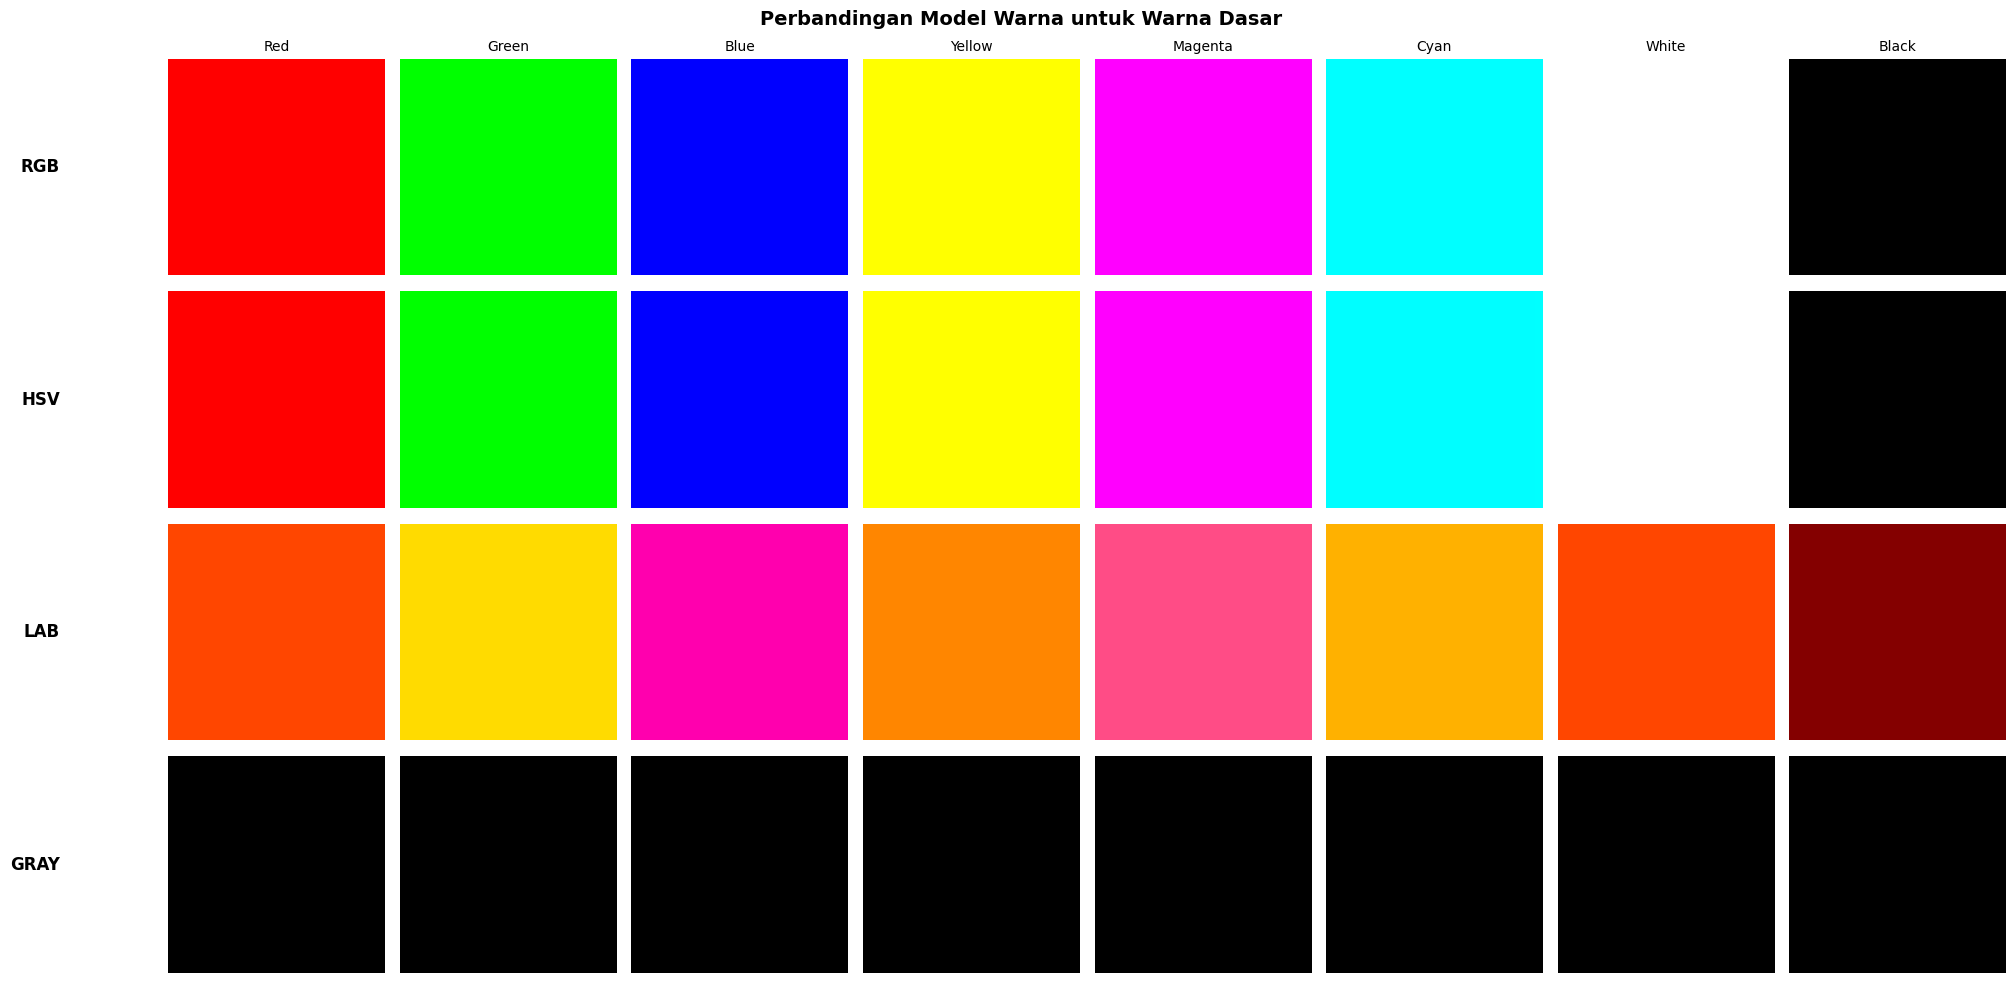

In [3]:
# 1. PERBANDINGAN MODEL WARNA
print("\n1. PERBANDINGAN MODEL WARNA DASAR")

# Buat citra dengan warna-warna dasar
color_patches = create_color_patches()

# Tampilkan dalam berbagai model warna
fig, axes = plt.subplots(4, 8, figsize=(20, 10))
models = ['RGB', 'HSV', 'LAB', 'GRAY']

for row, model in enumerate(models):
    for col, (name, patch) in enumerate(color_patches):
        if model == 'RGB':
            display_img = cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)
            axes[row, col].imshow(display_img)
        elif model == 'GRAY':
            gray_img = cv2.cvtColor(patch, cv2.COLOR_BGR2GRAY)
            axes[row, col].imshow(gray_img, cmap='gray')
        else:
            converted = analyze_color_model(patch, model)
            if model == 'HSV':
                # Convert HSV to RGB for display
                display_img = cv2.cvtColor(converted, cv2.COLOR_HSV2RGB)
            elif model == 'LAB':
                # LAB needs special handling for display
                lab = converted.astype(np.float32)
                lab[:,:,0] = lab[:,:,0] * 255/100  # L from [0,100] to [0,255]
                lab[:,:,1:] = lab[:,:,1:] + 128    # a,b from [-127,127] to [0,255]
                lab = np.clip(lab, 0, 255).astype(np.uint8)
                display_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
            axes[row, col].imshow(display_img)
        
        if row == 0:
            axes[row, col].set_title(name, fontsize=10)
        axes[row, col].axis('off')
    
    axes[row, 0].text(-0.5, 0.5, model, transform=axes[row, 0].transAxes,
                     fontsize=12, fontweight='bold', va='center', ha='right')

plt.suptitle('Perbandingan Model Warna untuk Warna Dasar', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


2. ANALISIS KOMPONEN WARNA PADA CITRA NYATA


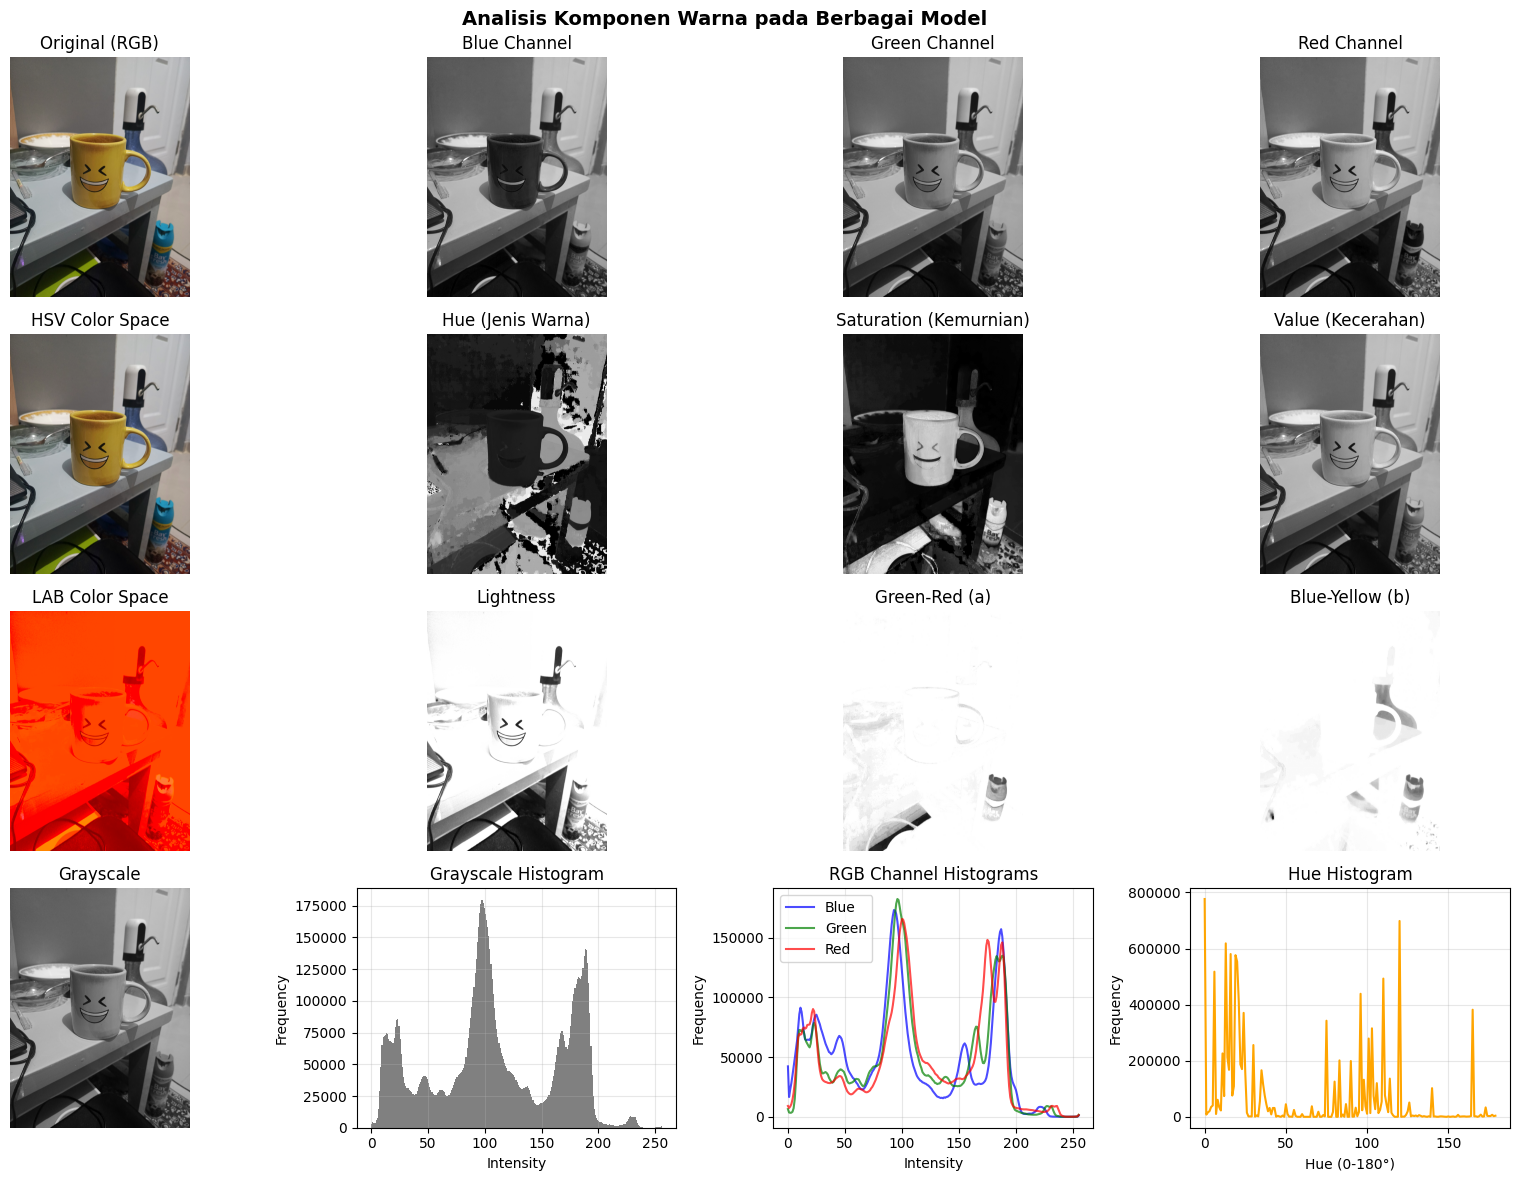

In [4]:
# 2. ANALISIS KOMPONEN WARNA
print("\n2. ANALISIS KOMPONEN WARNA PADA CITRA NYATA")

# Load sample image
sample_img = cv2.imread('normal.jpg')  # Ganti dengan path citra Anda
if sample_img is None:
    # Create synthetic image if file doesn't exist
    sample_img = np.zeros((300, 400, 3), dtype=np.uint8)
    cv2.rectangle(sample_img, (50, 50), (150, 150), (255, 0, 0), -1)  # Blue
    cv2.circle(sample_img, (250, 100), 50, (0, 255, 0), -1)  # Green
    cv2.ellipse(sample_img, (300, 200), (80, 40), 30, 0, 360, (0, 0, 255), -1)  # Red
    print("Menggunakan citra sintetik (file sample_image.jpg tidak ditemukan)")

# Convert to different color spaces
rgb_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2HSV)
lab_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2LAB)
gray_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY)

# Split channels for each model
rgb_channels = cv2.split(sample_img)  # B, G, R
hsv_channels = cv2.split(hsv_img)     # H, S, V
lab_channels = cv2.split(lab_img)     # L, a, b

# Display channel analysis
fig, axes = plt.subplots(4, 4, figsize=(16, 12))

# Row 1: RGB Channels
axes[0, 0].imshow(rgb_img)
axes[0, 0].set_title('Original (RGB)')
axes[0, 0].axis('off')

rgb_titles = ['Blue Channel', 'Green Channel', 'Red Channel']
for i in range(3):
    axes[0, i+1].imshow(rgb_channels[i], cmap='gray')
    axes[0, i+1].set_title(rgb_titles[i])
    axes[0, i+1].axis('off')

# Row 2: HSV Channels
axes[1, 0].imshow(cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB))
axes[1, 0].set_title('HSV Color Space')
axes[1, 0].axis('off')

hsv_titles = ['Hue (Jenis Warna)', 'Saturation (Kemurnian)', 'Value (Kecerahan)']
for i in range(3):
    axes[1, i+1].imshow(hsv_channels[i], cmap='gray')
    axes[1, i+1].set_title(hsv_titles[i])
    axes[1, i+1].axis('off')

# Row 3: LAB Channels
# Convert LAB for display
lab_display = lab_img.astype(np.float32)
lab_display[:,:,0] = lab_display[:,:,0] * 255/100
lab_display[:,:,1:] = lab_display[:,:,1:] + 128
lab_display = np.clip(lab_display, 0, 255).astype(np.uint8)
lab_display_rgb = cv2.cvtColor(lab_display, cv2.COLOR_LAB2RGB)

axes[2, 0].imshow(lab_display_rgb)
axes[2, 0].set_title('LAB Color Space')
axes[2, 0].axis('off')

lab_titles = ['Lightness', 'Green-Red (a)', 'Blue-Yellow (b)']
for i in range(3):
    if i == 0:
        # L channel needs scaling
        l_channel = lab_channels[i].astype(np.float32) * 255/100
        l_channel = np.clip(l_channel, 0, 255).astype(np.uint8)
        axes[2, i+1].imshow(l_channel, cmap='gray')
    else:
        # a and b channels need offset
        ab_channel = lab_channels[i].astype(np.float32) + 128
        ab_channel = np.clip(ab_channel, 0, 255).astype(np.uint8)
        axes[2, i+1].imshow(ab_channel, cmap='gray')
    axes[2, i+1].set_title(lab_titles[i])
    axes[2, i+1].axis('off')

# Row 4: Grayscale
axes[3, 0].imshow(gray_img, cmap='gray')
axes[3, 0].set_title('Grayscale')
axes[3, 0].axis('off')

# Show histogram of grayscale
axes[3, 1].hist(gray_img.ravel(), 256, [0, 256], color='gray')
axes[3, 1].set_title('Grayscale Histogram')
axes[3, 1].set_xlabel('Intensity')
axes[3, 1].set_ylabel('Frequency')
axes[3, 1].grid(True, alpha=0.3)

# Show color histogram
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist = cv2.calcHist([sample_img], [i], None, [256], [0, 256])
    axes[3, 2].plot(hist, color=color, alpha=0.7)
axes[3, 2].set_title('RGB Channel Histograms')
axes[3, 2].set_xlabel('Intensity')
axes[3, 2].set_ylabel('Frequency')
axes[3, 2].legend(['Blue', 'Green', 'Red'])
axes[3, 2].grid(True, alpha=0.3)

# Show HSV histogram
hsv_hist = cv2.calcHist([hsv_img], [0], None, [180], [0, 180])
axes[3, 3].plot(hsv_hist, color='orange')
axes[3, 3].set_title('Hue Histogram')
axes[3, 3].set_xlabel('Hue (0-180°)')
axes[3, 3].set_ylabel('Frequency')
axes[3, 3].grid(True, alpha=0.3)

plt.suptitle('Analisis Komponen Warna pada Berbagai Model', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


3. DEMONSTRASI TEOREMA SAMPLING DAN ALIASING


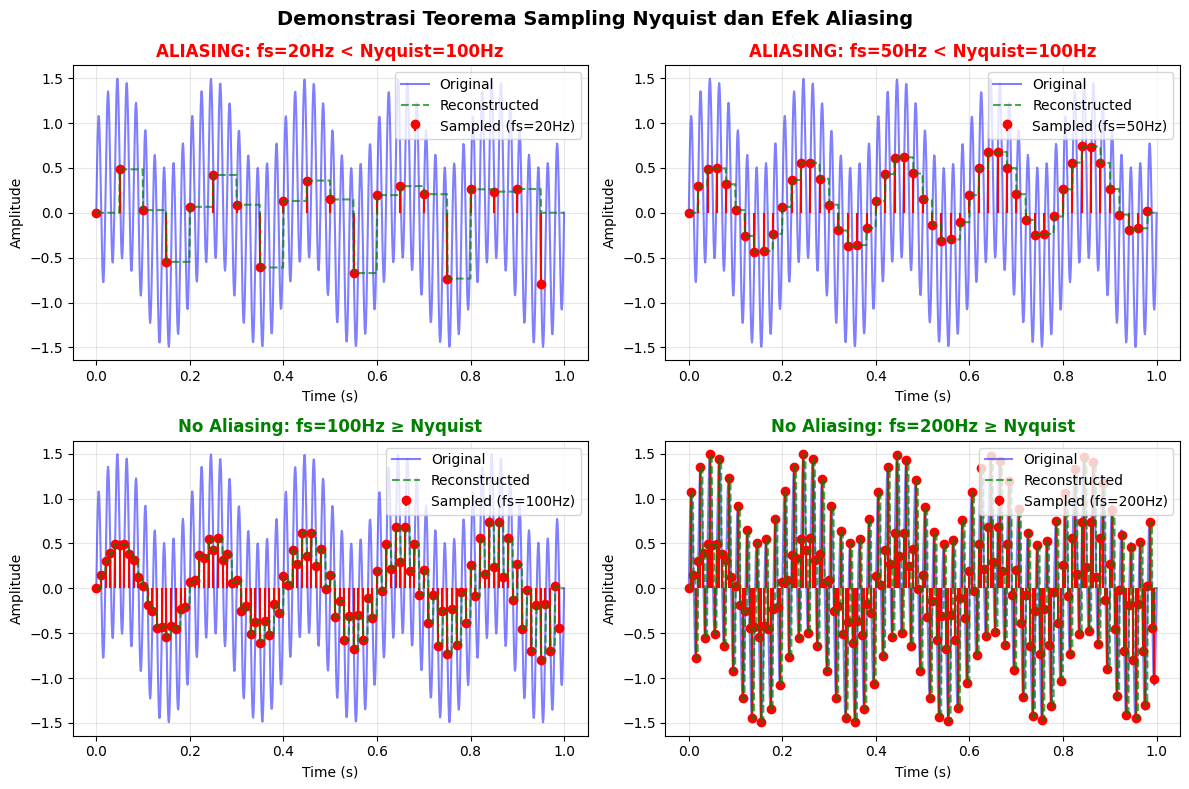

Frekuensi sinyal tinggi: 50 Hz
Nyquist rate minimum: 100 Hz
Sampling rates yang diuji: [20, 50, 100, 200] Hz


In [5]:
# 3. DEMONSTRASI TEOREMA SAMPLING DAN ALIASING
print("\n3. DEMONSTRASI TEOREMA SAMPLING DAN ALIASING")

def demonstrate_sampling_aliasing():
    """Demonstrate sampling theorem and aliasing effect"""
    # Create high frequency signal
    t = np.linspace(0, 1, 1000)  # High resolution time
    f_high = 50  # High frequency component
    f_low = 5    # Low frequency component
    
    signal_high = np.sin(2 * np.pi * f_high * t)
    signal_low = np.sin(2 * np.pi * f_low * t)
    signal_combined = signal_high + 0.5 * signal_low
    
    # Different sampling rates
    sampling_rates = [20, 50, 100, 200]  # Hz
    nyquist_rate = 2 * f_high  # Should be 100 Hz
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.ravel()
    
    for idx, fs in enumerate(sampling_rates):
        # Sampling
        t_sampled = np.arange(0, 1, 1/fs)
        indices = (t_sampled * 1000).astype(int)
        signal_sampled = signal_combined[indices]
        
        # Reconstruction (zero-order hold)
        t_recon = np.linspace(0, 1, 1000)
        signal_recon = np.zeros_like(t_recon)
        for i in range(len(t_sampled)-1):
            mask = (t_recon >= t_sampled[i]) & (t_recon < t_sampled[i+1])
            signal_recon[mask] = signal_sampled[i]
        
        # Plot
        axes[idx].plot(t, signal_combined, 'b-', alpha=0.5, label='Original')
        axes[idx].stem(t_sampled, signal_sampled, linefmt='r-', markerfmt='ro', 
                      basefmt=' ', label=f'Sampled (fs={fs}Hz)')
        axes[idx].plot(t_recon, signal_recon, 'g--', alpha=0.7, label='Reconstructed')
        
        # Check for aliasing
        if fs < nyquist_rate:
            axes[idx].set_title(f'ALIASING: fs={fs}Hz < Nyquist={nyquist_rate}Hz', 
                               color='red', fontweight='bold')
        else:
            axes[idx].set_title(f'No Aliasing: fs={fs}Hz ≥ Nyquist', 
                               color='green', fontweight='bold')
        
        axes[idx].set_xlabel('Time (s)')
        axes[idx].set_ylabel('Amplitude')
        axes[idx].legend(loc='upper right')
        axes[idx].grid(True, alpha=0.3)
    
    plt.suptitle('Demonstrasi Teorema Sampling Nyquist dan Efek Aliasing', 
                fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return sampling_rates, nyquist_rate

sampling_rates, nyquist_rate = demonstrate_sampling_aliasing()
print(f"Frekuensi sinyal tinggi: 50 Hz")
print(f"Nyquist rate minimum: {nyquist_rate} Hz")
print(f"Sampling rates yang diuji: {sampling_rates} Hz")


4. DEMONSTRASI KUANTISASI UNIFORM DAN NON-UNIFORM


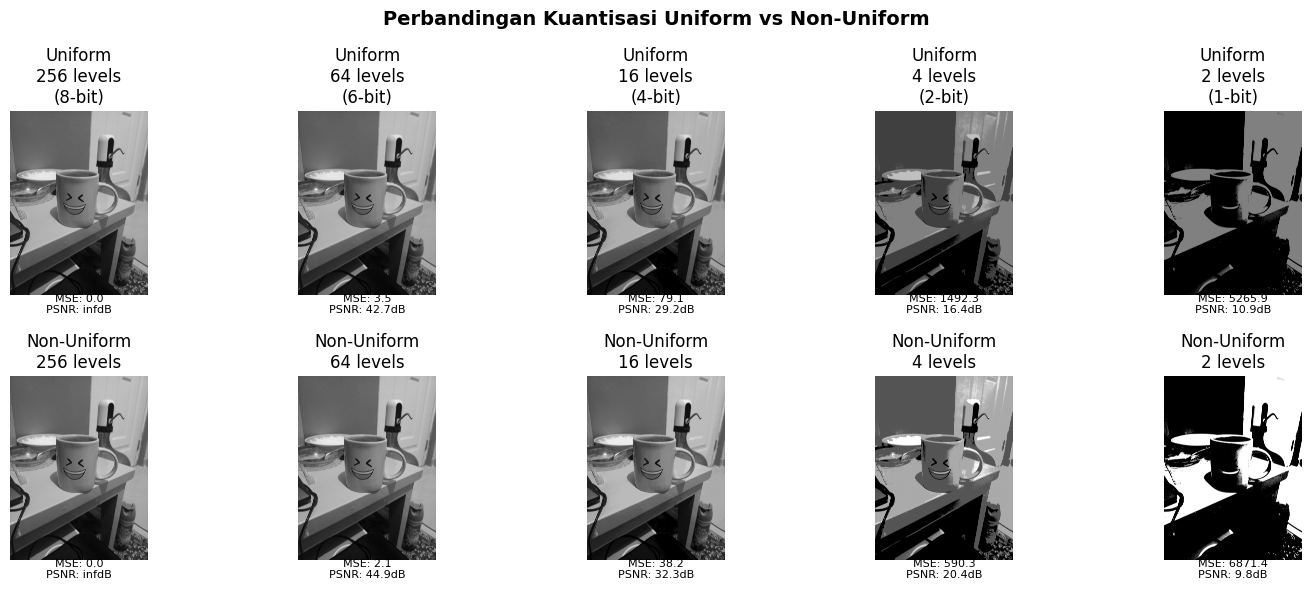

In [6]:
# 4. DEMONSTRASI KUANTISASI
print("\n4. DEMONSTRASI KUANTISASI UNIFORM DAN NON-UNIFORM")

def demonstrate_quantization():
    """Demonstrate uniform and non-uniform quantization"""
    # Create test image
    test_img = gray_img if len(gray_img.shape) == 2 else cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY)
    
    # Uniform quantization
    quantization_levels = [256, 64, 16, 4, 2]  # 8-bit, 6-bit, 4-bit, 2-bit, 1-bit
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    
    # Uniform quantization
    for idx, levels in enumerate(quantization_levels):
        # Calculate step size
        step = 256 // levels
        quantized_uniform = (test_img // step) * step
        
        # Display
        axes[0, idx].imshow(quantized_uniform, cmap='gray', vmin=0, vmax=255)
        axes[0, idx].set_title(f'Uniform\n{levels} levels\n({int(np.log2(levels))}-bit)')
        axes[0, idx].axis('off')
        
        # Calculate MSE
        mse = np.mean((test_img.astype(float) - quantized_uniform.astype(float))**2)
        psnr = 10 * np.log10(255**2 / mse) if mse > 0 else float('inf')
        axes[0, idx].text(0.5, -0.1, f'MSE: {mse:.1f}\nPSNR: {psnr:.1f}dB', 
                         transform=axes[0, idx].transAxes, ha='center', fontsize=8)
    
    # Non-uniform quantization (using histogram equalization principle)
    for idx, levels in enumerate(quantization_levels):
        # Calculate histogram
        hist, bins = np.histogram(test_img.flatten(), 256, [0, 256])
        
        # Calculate cumulative distribution
        cdf = hist.cumsum()
        cdf_normalized = cdf / cdf.max()
        
        # Create mapping function for non-uniform quantization
        mapping = np.zeros(256, dtype=np.uint8)
        for i in range(levels):
            lower = i * 256 // levels
            upper = (i + 1) * 256 // levels
            mapping[lower:upper] = i * 255 // (levels - 1)
        
        # Apply non-uniform quantization
        quantized_nonuniform = mapping[test_img]
        
        # Display
        axes[1, idx].imshow(quantized_nonuniform, cmap='gray', vmin=0, vmax=255)
        axes[1, idx].set_title(f'Non-Uniform\n{levels} levels')
        axes[1, idx].axis('off')
        
        # Calculate MSE
        mse = np.mean((test_img.astype(float) - quantized_nonuniform.astype(float))**2)
        psnr = 10 * np.log10(255**2 / mse) if mse > 0 else float('inf')
        axes[1, idx].text(0.5, -0.1, f'MSE: {mse:.1f}\nPSNR: {psnr:.1f}dB', 
                         transform=axes[1, idx].transAxes, ha='center', fontsize=8)
    
    plt.suptitle('Perbandingan Kuantisasi Uniform vs Non-Uniform', 
                fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return quantization_levels

quant_levels = demonstrate_quantization()


5. KONVERSI RUANG WARNA DAN APLIKASI PRAKTIS


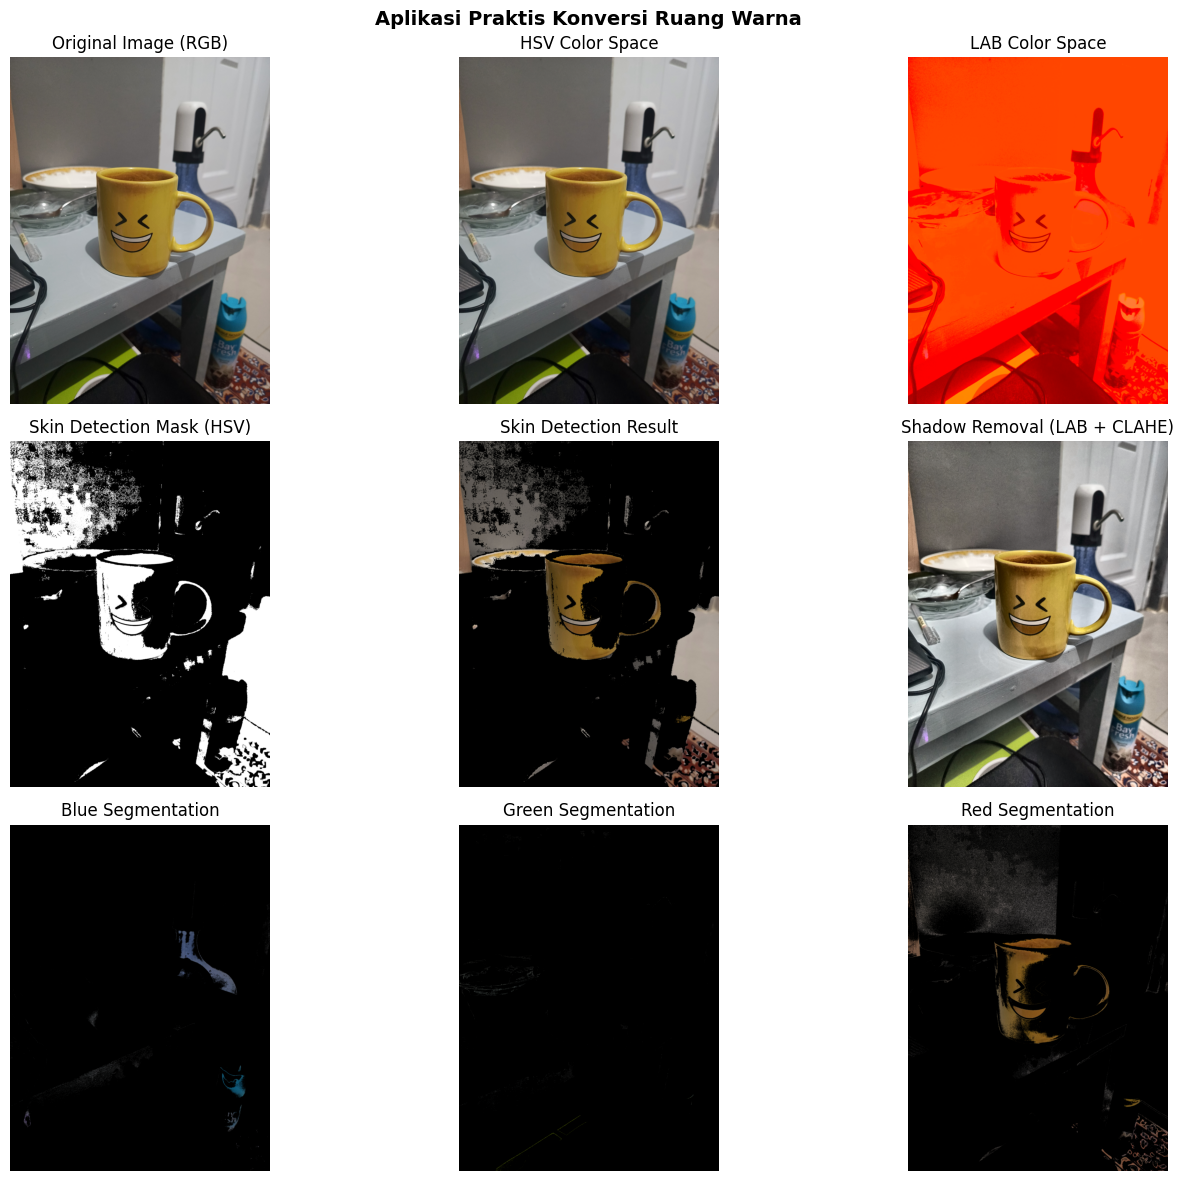


=== PRAKTIKUM SELESAI ===

Ringkasan yang dipelajari:
1. Perbandingan model warna RGB, HSV, LAB, Grayscale
2. Teorema Sampling Nyquist dan efek aliasing
3. Teknik kuantisasi uniform dan non-uniform
4. Konversi antar ruang warna dan aplikasi praktis


In [7]:
# 5. KONVERSI RUANG WARNA DAN APLIKASI
print("\n5. KONVERSI RUANG WARNA DAN APLIKASI PRAKTIS")

def demonstrate_color_conversion_applications():
    """Demonstrate practical applications of color space conversions"""
    # Load or create sample image
    if sample_img is None:
        # Create synthetic image for demonstration
        demo_img = np.zeros((300, 400, 3), dtype=np.uint8)
        # Add various colors and patterns
        cv2.rectangle(demo_img, (50, 50), (150, 150), (100, 150, 200), -1)  # Sky blue
        cv2.rectangle(demo_img, (200, 50), (300, 150), (200, 100, 50), -1)   # Brown
        cv2.circle(demo_img, (100, 220), 40, (50, 200, 100), -1)  # Green
        cv2.circle(demo_img, (250, 220), 40, (200, 50, 150), -1)  # Purple
    else:
        demo_img = sample_img
    
    # Application 1: Skin Detection using HSV
    hsv_img = cv2.cvtColor(demo_img, cv2.COLOR_BGR2HSV)
    
    # Define skin color range in HSV
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)
    
    # Create skin mask
    skin_mask = cv2.inRange(hsv_img, lower_skin, upper_skin)
    
    # Apply mask to original image
    skin_detected = cv2.bitwise_and(demo_img, demo_img, mask=skin_mask)
    
    # Application 2: Shadow removal using LAB
    lab_img = cv2.cvtColor(demo_img, cv2.COLOR_BGR2LAB)
    L, a, b = cv2.split(lab_img)
    
    # Apply CLAHE to L channel (improves shadow details)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    L_enhanced = clahe.apply(L)
    
    # Merge back
    lab_enhanced = cv2.merge([L_enhanced, a, b])
    rgb_enhanced = cv2.cvtColor(lab_enhanced, cv2.COLOR_LAB2BGR)
    
    # Application 3: Color-based segmentation using RGB
    # Define color ranges for segmentation
    colors_to_segment = [
        ('Blue', [100, 0, 0], [255, 100, 100]),
        ('Green', [0, 100, 0], [100, 255, 100]),
        ('Red', [0, 0, 100], [100, 100, 255])
    ]
    
    # Create segmentation masks
    segmentation_results = []
    for color_name, lower, upper in colors_to_segment:
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = cv2.inRange(demo_img, lower, upper)
        segmented = cv2.bitwise_and(demo_img, demo_img, mask=mask)
        segmentation_results.append((color_name, segmented))
    
    # Display results
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    
    # Row 1: Original and conversions
    axes[0, 0].imshow(cv2.cvtColor(demo_img, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original Image (RGB)')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB))
    axes[0, 1].set_title('HSV Color Space')
    axes[0, 1].axis('off')
    
    lab_display = lab_img.astype(np.float32)
    lab_display[:,:,0] = lab_display[:,:,0] * 255/100
    lab_display[:,:,1:] = lab_display[:,:,1:] + 128
    lab_display = np.clip(lab_display, 0, 255).astype(np.uint8)
    axes[0, 2].imshow(cv2.cvtColor(lab_display, cv2.COLOR_LAB2RGB))
    axes[0, 2].set_title('LAB Color Space')
    axes[0, 2].axis('off')
    
    # Row 2: Applications
    axes[1, 0].imshow(skin_mask, cmap='gray')
    axes[1, 0].set_title('Skin Detection Mask (HSV)')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(cv2.cvtColor(skin_detected, cv2.COLOR_BGR2RGB))
    axes[1, 1].set_title('Skin Detection Result')
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(cv2.cvtColor(rgb_enhanced, cv2.COLOR_BGR2RGB))
    axes[1, 2].set_title('Shadow Removal (LAB + CLAHE)')
    axes[1, 2].axis('off')
    
    # Row 3: Color segmentation
    for idx, (color_name, segmented) in enumerate(segmentation_results):
        axes[2, idx].imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
        axes[2, idx].set_title(f'{color_name} Segmentation')
        axes[2, idx].axis('off')
    
    # Hide unused subplots
    for i in range(3, 9):
        axes.flat[i].axis('off')
    
    plt.suptitle('Aplikasi Praktis Konversi Ruang Warna', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return skin_mask, rgb_enhanced

skin_mask_result, enhanced_result = demonstrate_color_conversion_applications()

print("\n=== PRAKTIKUM SELESAI ===")
print("\nRingkasan yang dipelajari:")
print("1. Perbandingan model warna RGB, HSV, LAB, Grayscale")
print("2. Teorema Sampling Nyquist dan efek aliasing")
print("3. Teknik kuantisasi uniform dan non-uniform")
print("4. Konversi antar ruang warna dan aplikasi praktis")